# Movie Recommendations System using a Collaborative Filtering Approach

# 1. Business Understanding

### (a) Introduction

Movie recommendation systems have become an integral element of contemporary digital entertainment platforms, enriching user experiences by offering personalized movie suggestions. These systems harness the capabilities of machine learning algorithms to analyze user behavior, historical data, and movie features, enabling the delivery of tailored recommendations. In this exploration, we delve into the construction of a movie recommendation system utilizing the MovieLens dataset from the GroupLens research lab at the University of Minnesota. Widely recognized in the field of recommendation systems, the MovieLens dataset encompasses user ratings for a diverse array of movies, providing valuable insights into individual preferences. For our analysis, we will focus on the "small" dataset, consisting of 100,000 user ratings. This smaller subset ensures computational efficiency and is well-suited for the initial development stages.

### (b) Problem Statement

In the context of enhancing user engagement and satisfaction on a streaming platform, our specific business objective is to elevate the user experience by delivering personalized movie recommendations. This aims to actively involve users, extend their time spent on the platform, and potentially increase revenue through heightened viewership. Our strategy involves employing machine learning algorithms, such as collaborative filtering and content-based filtering, to analyze user ratings and preferences. Collaborative filtering discerns patterns by comparing user behaviors, while content-based filtering focuses on movie features and characteristics.

In subsequent sections, we will delve into the intricacies of data preprocessing, model selection, and evaluation metrics. The overarching aim is to develop a robust recommendation system that provides precise and appealing movie suggestions tailored to the unique preferences of each user.

### (c) Defining Metrics of Success

The success of a movie recommendation model using collaborative filtering can be assessed using various metrics that measure its effectiveness in providing accurate and relevant movie suggestions. The combination of the metrics provides a comprehensive understanding of its performance in terms of accuracy, relevance, and user satisfaction. It's essential to choose metrics that align with the specific goals and objectives of the recommendation system and the preferences of the user base.

### (d) Research Questions

1. What features contribute most to the accuracy of collaborative filtering in generating top  movie recommendations?

2. How does the frequency of user ratings influence the accuracy and stability of the movie recommendation model?

3. What are the correlation between user ratings and various movie features?

4. Which movie features demonstrate the highest correlation with collaborative filtering recommendations, and how do they impact the model's predictions?

5. How successful is the collaborative filtering model in providing accurate and tailored movie recommendations based on user ratings and preferences?

### (e) The Main Objective

To develop and implement a movie recommendation system that leverages collaborative filtering techniques to provide personalized top 5 movie recommendations for users.

### (f) The Specific Objectives

1. To clean and preprocess the MovieLens datasets to ensure it is suitable for building a recommendation system.

2. To understand the distribution of movie ratings, explore user behavior, and identify patterns in the datasets.

3. To investigate and compare collaborative filtering techniques for building the recommendation system, such as Singular Value Decomposition (SVD), user-based and item-based.

4. To implement and evaluate the performance of the collaborative filtering model using appropriate metrics such as RSME and MSE.

5. To generate top 5 movie recommendations for a user based on their historical ratings.

### (g) Data Understanding

The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were generated by 610 users between March 29, 1996, and September 24, 2018.
The data used in this project will be pulled from 4 different separate file:

*1. Movies Data (movies.csv):*
Contains movie information, including titles and genres with the following columns:
 * movieId: Unique identifier for each movie.
 * title: The title of the movie, which also includes the year of release in parentheses.
 * genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).

*2. Links Data (links.csv):*
Provides identifiers for linking to external movie-related sources (IMDb, TMDb) and has the followinf columns:
* movieId: Unique identifier for each movie, consistent with other data files.
* imdbId: Identifier for movies used by IMDb (Internet Movie Database).
* tmdbId: Identifier for movies used by TMDb (The Movie Database).

*3. Ratings Data (ratings.csv):*
Contains user ratings on a 5-star scale for movies and has the following columns:
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
* timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

*4. Tags Data (tags.csv):*
Contains user-generated metadata (tags) about movies and has the following columns:
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* tag: User-generated metadata describing a movie, typically a single word or short phrase.
* timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [1]:
#importing relevant packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In [2]:
# Import the pandas library
import pandas as pd

# Read CSV files into data frames
movies = pd.read_csv("data/ml-latest-small/movies.csv")  # Load movies data
links = pd.read_csv("data/ml-latest-small/links.csv")    # Load links data
ratings = pd.read_csv("data/ml-latest-small/ratings.csv")  # Load ratings data
tags = pd.read_csv("data/ml-latest-small/tags.csv")        # Load tags data

In [3]:
#reading the first 3 rows
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
#reading the first 3 rows
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [5]:
#reading the first 3 rows
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [6]:
#reading the first 3 rows
tags.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [7]:
#merge movies and links on 'movieId'
df = pd.merge(movies, links, on='movieId')

#merge with ratings on 'movieId'
df = pd.merge(df, ratings, on='movieId')

#merge with tags on 'movieId'
df = pd.merge(df, tags, on='movieId')

df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,474,pixar,1137206825


In [8]:
# Display the shape of the DataFrame
df.shape

(233213, 11)

This signifies that the DataFrame consists of 233,213 rows and 9 columns. Each row corresponds to a unique combination of user-movie interaction, which may include ratings and tags, while the columns represent the attributes of these interactions.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      233213 non-null  int64  
 1   title        233213 non-null  object 
 2   genres       233213 non-null  object 
 3   imdbId       233213 non-null  int64  
 4   tmdbId       233213 non-null  float64
 5   userId_x     233213 non-null  int64  
 6   rating       233213 non-null  float64
 7   timestamp_x  233213 non-null  int64  
 8   userId_y     233213 non-null  int64  
 9   tag          233213 non-null  object 
 10  timestamp_y  233213 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 21.4+ MB


In [10]:
# Display descriptive statistics of the DataFrame
df.describe()

,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,timestamp_y
count,233213.000000,2.332130e+05,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,2.332130e+05
mean,12319.999443,2.610632e+05,9378.277742,309.688191,3.966535,1.213524e+09,470.683564,1.384774e+09
std,28243.919401,4.414411e+05,36943.139800,178.206387,0.968637,2.250448e+08,153.329632,1.534621e+08
min,1.000000,1.234900e+04,11.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,1.103570e+05,278.000000,156.000000,3.500000,1.017365e+09,424.000000,1.242494e+09
50%,1198.000000,1.109120e+05,680.000000,309.000000,4.000000,1.217325e+09,477.000000,1.457901e+09
75%,4638.000000,1.724950e+05,1892.000000,460.000000,5.000000,1.443201e+09,599.000000,1.498457e+09
max,193565.000000,5.580390e+06,503475.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


In [11]:
# List of columns to be dropped from the DataFrame
columns_to_drop = ['timestamp_x', 'timestamp_y']

# Drop the specified columns in-place from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the modified DataFrame
df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,userId_y,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,567,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,336,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,474,pixar


In [12]:
# Get the column names of the DataFrame and store them in a list
column_names = df.columns.tolist()

# Display the list of column names
column_names

['movieId',
 'title',
 'genres',
 'imdbId',
 'tmdbId',
 'userId_x',
 'rating',
 'userId_y',
 'tag']

In [13]:
# Check for missing values in each column of the DataFrame 'df' and sum them up
df.isnull().sum()

movieId     0
title       0
genres      0
imdbId      0
tmdbId      0
userId_x    0
rating      0
userId_y    0
tag         0
dtype: int64

In [14]:
# Count the number of duplicated rows in the DataFrame 'df'
df.duplicated().sum()

0

We will exclusively utilize the `movies.csv` dataset and the `ratings.csv` dataset for our analysis, as these two datasets encompass the necessary columns and information required for our project.

In [15]:
# Function to load and join CSV files based on a common column (movieId)
def load_and_join_csv(file_path_1, file_path_2, file_path_3):
    # Load CSV files into Pandas DataFrames
    movies = pd.read_csv(file_path_1)
    ratings = pd.read_csv(file_path_2)
    # Note: 'tags' DataFrame is not used in the current implementation
    
    # Perform an inner join to combine the datasets based on the common column 'movieId'
    movies_ratings_df = pd.merge(movies, ratings, on='movieId', how='inner')
      
    return movies_ratings_df

In [16]:
# Replace the placeholders with the actual file paths
file_path_movies = "data/ml-latest-small/movies.csv"
file_path_ratings = "data/ml-latest-small/ratings.csv"
file_path_tags = "ml-latest-small/tags.csv"

# Call the function with the specified file paths
movie_rating_df = load_and_join_csv(file_path_movies, file_path_ratings, file_path_tags)

# Display the resulting dataset
movie_rating_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


### Data type Conversion 

Convert timestamp to datetime

In [17]:
# Converting 'timestamp' column to datetime type using seconds as the unit
movie_rating_df['timestamp'] = pd.to_datetime(movie_rating_df['timestamp'], unit='s')

# Displaying information about the DataFrame after the conversion
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


### Feature Engineering 

In the following cell, we add two additional columns, specifically "hour" and "month," to simplify the analysis of user engagement peaks at different hours of the day and month.

In [18]:
# Import the calendar module
import calendar

# Extract the hour and month from the 'timestamp' column and create new columns
movie_rating_df['hour'] = movie_rating_df['timestamp'].dt.hour
movie_rating_df['month'] = movie_rating_df['timestamp'].dt.month

# Display information about the DataFrame, including data types and non-null counts
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
 6   hour       100836 non-null  int64         
 7   month      100836 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 6.9+ MB


# Exploratory Data Analysis (EDA)

In [19]:
movie_rating_df

,movieId,title,genres,userId,rating,timestamp,hour,month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,18,7
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,6,11
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25 06:52:26,6,1
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13 12:59:30,12,11
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18 05:28:03,5,5
...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,2018-09-16 14:44:42,14,9
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,2018-09-16 14:52:25,14,9
100833,193585,Flint (2017),Drama,184,3.5,2018-09-16 14:56:45,14,9
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,2018-09-16 15:00:21,15,9


### Average Hourly Rating 

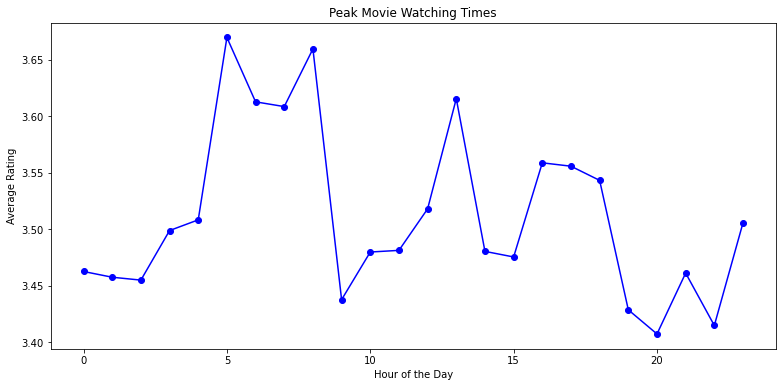

In [20]:
# Group the movie ratings DataFrame by hour and calculate the average rating for each hour
hourly_average_ratings = movie_rating_df.groupby('hour')['rating'].mean()

# Plotting the peak viewing time trends
plt.figure(figsize=(13, 6))
hourly_average_ratings.plot(kind='line', marker='o', color='blue', title='Peak Movie Watching Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rating')
plt.show()

0600hrs appears to have the highest ratings, while 2000hrs  has the lowest. This  could suggest that viewers tend to rate movies more positively in the early morning hours and potentially less favorably in the evening.

### Average Monthly Rating 

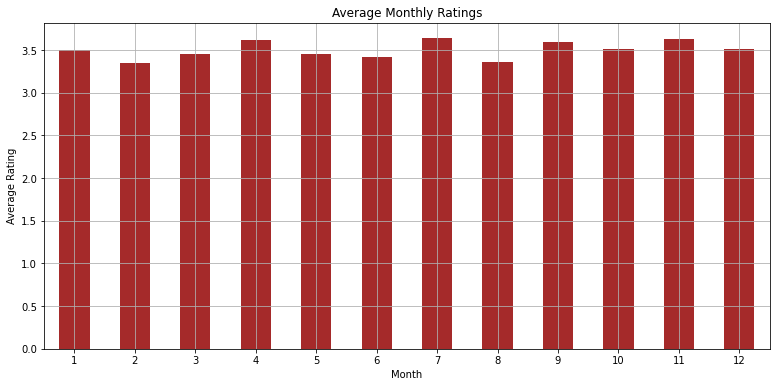

In [21]:
# Extract the month from the 'timestamp' column and create a new 'month' column
movie_rating_df['month'] = movie_rating_df['timestamp'].dt.month

# Calculate the average rating for each month using groupby
monthly_average_ratings = movie_rating_df.groupby('month')['rating'].mean()

# Plotting the average monthly rating graph with grid lines
plt.figure(figsize=(13, 6))
monthly_average_ratings.plot(kind='bar', color='brown', title='Average Monthly Ratings', grid=True)
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()

High-Rated Months (Average Rating 3.5 and above): January (1), April (4), July (7), September (9), October (10), November (11), and December (12) consistently show average ratings of 3.5 and above. This suggests that movies released or watched during these months tend to be well-received or rated more positively by viewers.

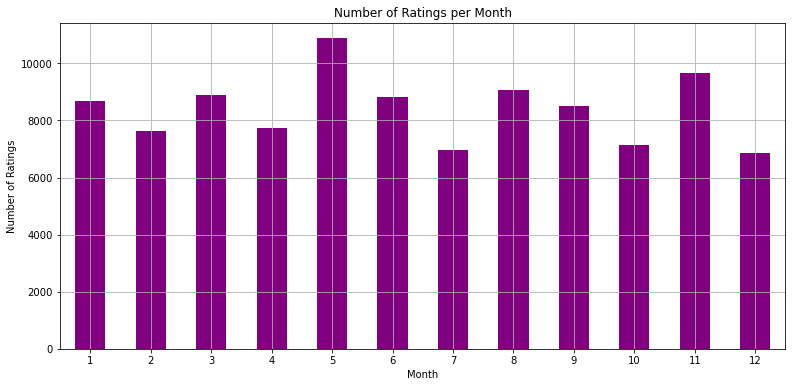

In [22]:
# Extract the month from the 'timestamp' column and create a new 'month' column
movie_rating_df['month'] = movie_rating_df['timestamp'].dt.month

# Group the DataFrame by month and calculate the count of ratings for each month
monthly_rating_counts = movie_rating_df.groupby('month')['rating'].count()

# Plotting the number of ratings per month with grid lines
plt.figure(figsize=(13, 6))
monthly_rating_counts.plot(kind='bar', color='purple', title='Number of Ratings per Month', grid=True)
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()

The bar chart indicates that the month of May (month 5) has the highest count of ratings. This suggests that users are more active in providing ratings during the month of May compared to other months.

### UNIVARIATE DATA ANALYSIS

In [23]:
# A function to create various types of plots based on the specified plot_type

def create_plots(df, plot_type, columns_to_plot=None, y=None):
    """
    Args:
    - df: DataFrame, the input data
    - plot_type: str, the type of plot to create ('count_plot', 'bar_plot1', 'bar_plot2')
    - columns_to_plot: Series or DataFrame, data for the plot
    - y: str, the column name for the y-axis (only used in 'bar_plot2')

    Returns:
    - None
    """
    if plot_type == 'count_plot':
        # Create a count plot for the specified column
        plt.figure(figsize=(14, 9))
        sns.countplot(data=df, x=columns_to_plot)
        plt.title(f'Distribution of movie {columns_to_plot}')
        plt.xticks(rotation=90)
        plt.show()
    elif plot_type == 'bar_plot_1':
        # Create a bar plot for the top 10 most frequently rated movies
        plt.figure(figsize=(14, 9))
        sns.barplot(columns_to_plot.index, columns_to_plot.values)
        plt.title('Top 10 most frequently rated movies')
        plt.xlabel('Movie Title')
        plt.xticks(rotation=90)
        plt.ylabel('Count')
        plt.show()
    elif plot_type == 'bar_plot_2':
        # Create a bar plot for the top 10 most frequently rated movies and their average ratings
        plt.figure(figsize=(14, 9))
        sns.barplot(columns_to_plot.index, columns_to_plot.values, y=y)
        plt.title('Top 10 most frequently rated movies and their average ratings')
        plt.xlabel('Movie Title')
        plt.xticks(rotation=90)
        plt.ylabel('Average Rating')
        plt.show()


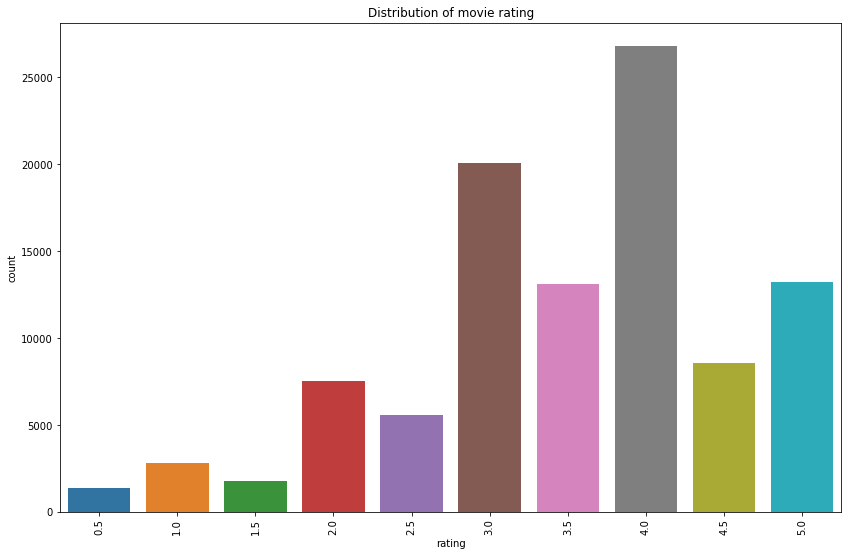

In [24]:
create_plots(movie_rating_df, 'count_plot', 'rating')

The graph above visualizes both the count and average rating for the top 10 most frequently rated movies.


The highest rating is 4 indicates that a significant number of users have given a rating of "4" to the movies in your dataset. This could suggest that a majority of users generally enjoy the movies, as they tend to give higher ratings.

In [25]:
# Count the number of ratings for each unique movieId
movie_ratings_count = ratings['movieId'].value_counts()

/Users/yusranoor/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


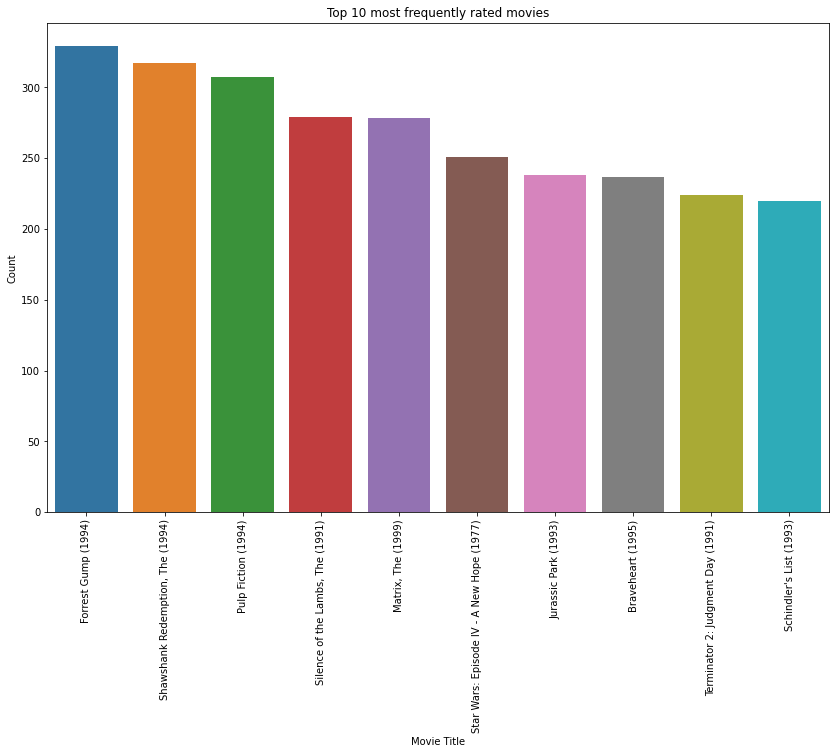

In [26]:
# Get the top 10 most frequently rated movies
top_10_watched_movies = movie_rating_df['title'].value_counts().head(10)

# Create a bar plot to visualize the distribution of ratings for the top 10 movies
create_plots(movie_rating_df, plot_type='bar_plot_1', columns_to_plot=top_10_watched_movies)

The visualization provides insights into the popularity of movies based on the number of ratings they have received.

"Forrest Gump" is the most popular and frequently rated movies among the users.

### What are the lowest and highest rated movies? 

Which movie has the lowest and highest average rating?

In [27]:
# Calculate the mean rating for each movie
mean_ratings = ratings.groupby('movieId')[['rating']].mean()

# Find the movie with the lowest mean rating
lowest_rated_movie_id = mean_ratings['rating'].idxmin()

# Retrieve information about the movie with the lowest mean rating
lowest_rated_movie_info = movies[movies['movieId'] == lowest_rated_movie_id]
lowest_rated_movie_info

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [28]:
# Find the movie with the highest average rating
highest_rated_movie_id = mean_ratings['rating'].idxmax()

# Retrieve information about the highest-rated movie from the 'movies' DataFrame
highest_rated_movie_info = movies[movies['movieId'] == highest_rated_movie_id]
highest_rated_movie_info

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


How many ratings does Lamerica have?

In [29]:
# Filter the 'ratings' DataFrame to include only rows where 'movieId' is equal to the highest rated movie
highest_rated_movie_ratings = ratings[ratings['movieId'] == highest_rated_movie_id]
highest_rated_movie_ratings

,userId,movieId,rating,timestamp
13368,85,53,5.0,889468268
96115,603,53,5.0,963180003


 The movie with the lowest mean rating, which is "Gypsy (1962)," and The movie with the highest mean rating, which is "Lamerica (1994)." 

In [30]:
# Function to split genres in the 'genres' column and count their occurrences
def splitting_string(movies):
    # Splitting the genres string into a list of genres
    movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
    
    # Counting the frequency of each genre using Counter
    from collections import Counter
    genre_frequency = Counter(g for genres in movies['genres'] for g in genres)
    
    return genre_frequency

In [31]:
# Applying the function to the 'movie_rating_df' DataFrame
genre_count = splitting_string(movie_rating_df)
genre_count

Counter({'Adventure': 24161,
         'Animation': 6988,
         'Children': 9208,
         'Comedy': 39053,
         'Fantasy': 11834,
         'Romance': 18124,
         'Drama': 41928,
         'Action': 30635,
         'Crime': 16681,
         'Thriller': 26452,
         'Horror': 7291,
         'Mystery': 7674,
         'Sci-Fi': 17243,
         'War': 4859,
         'Musical': 4138,
         'Documentary': 1219,
         'IMAX': 4145,
         'Western': 1930,
         'Film-Noir': 870,
         '(no genres listed)': 47})

It shows the count of occurrences for each genre in the  DataFrame.Each key represents a genre, and the corresponding value is the count of how many times that genre appears in the  DataFrame. 

In [32]:
# Create a copy of the original DataFrame
new_df = movie_rating_df.copy()

# Explode the 'genres' column to have one row for each genre associated with a movie
new_df = new_df.explode('genres')

# Display the modified DataFrame
new_df

,movieId,title,genres,userId,rating,timestamp,hour,month
0,1,Toy Story (1995),Adventure,1,4.0,2000-07-30 18:45:03,18,7
0,1,Toy Story (1995),Animation,1,4.0,2000-07-30 18:45:03,18,7
0,1,Toy Story (1995),Children,1,4.0,2000-07-30 18:45:03,18,7
0,1,Toy Story (1995),Comedy,1,4.0,2000-07-30 18:45:03,18,7
0,1,Toy Story (1995),Fantasy,1,4.0,2000-07-30 18:45:03,18,7
...,...,...,...,...,...,...,...,...
100832,193583,No Game No Life: Zero (2017),Fantasy,184,3.5,2018-09-16 14:52:25,14,9
100833,193585,Flint (2017),Drama,184,3.5,2018-09-16 14:56:45,14,9
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action,184,3.5,2018-09-16 15:00:21,15,9
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,184,3.5,2018-09-16 15:00:21,15,9


The 'genres' column is exploded so that each row now corresponds to a single genre associated with a movie. 

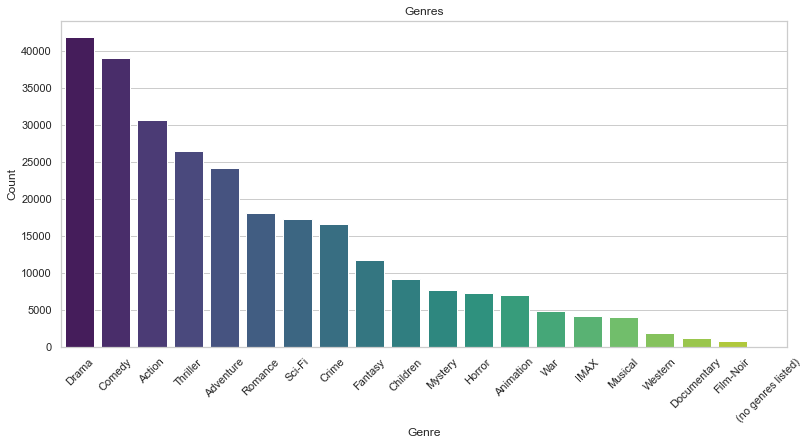

In [33]:
# Visualization of genres in descending order of frequency

# Convert genre_count dictionary to a DataFrame
genre_df = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])

# Sort DataFrame by Count in descending order
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Assign the sorted DataFrame to 'all_genres'
all_genres = genre_df

# Plotting the bar chart
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.barplot(x='Genre', y='Count', data=all_genres, palette="viridis")
plt.title('Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The high count of "Drama" suggests that movies classified under the Drama genre are very common in your dataset. Viewers in the dataset seem to have rated or interacted with a significant number of movies that fall into the Drama category.
On the other hand, the low count of "Film-Noir" indicates that movies in the Film-Noir genre are less common or less frequently rated in the dataset. 

In [34]:
# Calculate the total number of ratings
n_ratings = len(ratings)

# Calculate the number of unique movieIds and users
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

# Display the results
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieIds: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings / n_users, 3)}")
print(f"Average number of ratings per movie: {round(n_ratings / n_movies, 3)}")

Number of ratings: 100836
Number of unique movieIds: 9724
Number of unique users: 610
Average number of ratings per user: 165.305
Average number of ratings per movie: 10.37


The dataset contains 100,836 ratings, 9,724 unique movieIds, 610 unique users, and an average of 165.305 ratings per user and 10.37 ratings per movie.

In [35]:
# Calculate and print the mean global rating
global_mean_rating = round(ratings['rating'].mean(), 2)
print(f"Mean global rating: {global_mean_rating}.")

# Calculate mean rating per user, then calculate and print the overall mean of those user means
mean_ratings_per_user = ratings.groupby('userId')['rating'].mean()
overall_mean_per_user = round(mean_ratings_per_user.mean(), 2)
print(f"Mean rating per user: {overall_mean_per_user}.")

Mean global rating: 3.5.
Mean rating per user: 3.66.


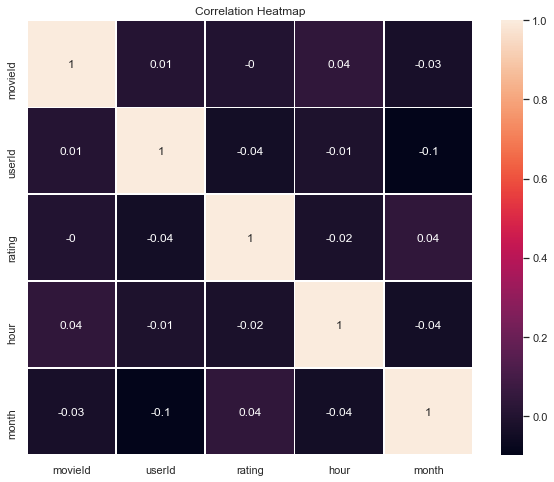

In [36]:
# Calculate the correlations between features in the DataFrame
correlations = new_df.corr()

# Create a heatmap for visualizing the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(round(correlations, 2), annot=True, linewidths=.7)
plt.title('Correlation Heatmap')
plt.show()

The correlation coefficient ranges from -1 to 1, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation.

The correlation between movieId and userId is very small, indicating a weak positive relationship. 

The correlation between movieId and rating is also very small, indicating a weak negative relationship.

The hour and month have a small positive correlation.

### BIVARIATE DATA ANALYSIS

/Users/yusranoor/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


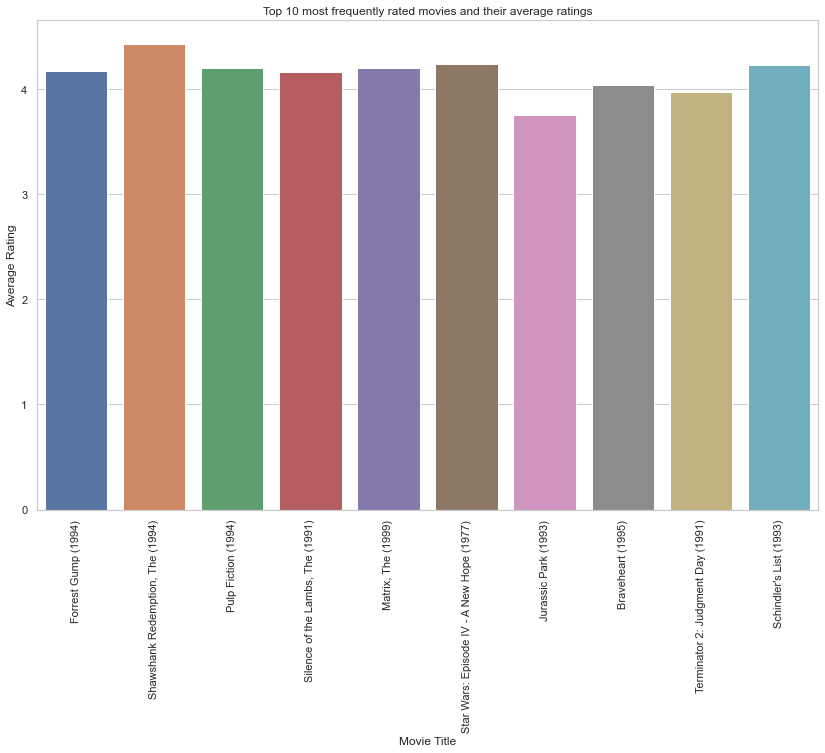

In [37]:
# Get the top 10 most-watched movies by count of ratings
top_10_watched_movies = movie_rating_df['title'].value_counts().nlargest(10)

# Calculate the average ratings for the top 10 watched movies
average_ratings = movie_rating_df.groupby('title')['rating'].mean().loc[top_10_watched_movies.index]

# Create a bar plot displaying the average ratings of the top 10 most-watched movies
create_plots(movie_rating_df, 'bar_plot_2', average_ratings)

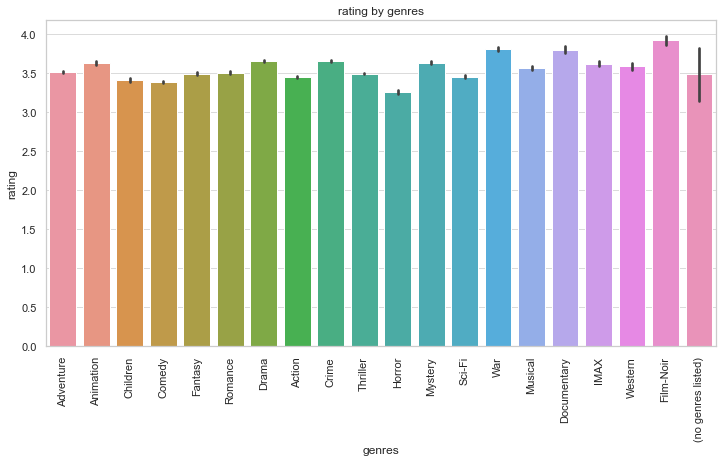

In [38]:
def bar_plot(x, y, data):
    """
    Create a bar plot to visualize the relationship between two variables.

    Args:
    - x: str, the column name for the x-axis
    - y: str, the column name for the y-axis
    - data: DataFrame, the input data

    Returns:
    - None
    """
    # Set up the plot size
    plt.figure(figsize=(12, 6))
    
    # Create a bar plot using Seaborn
    sns.barplot(x=x, y=y, data=data)
    
    # Set plot title and axis labels
    plt.title(f'{y} by {x}')
    plt.xlabel(f'{x}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{y}')
    # Add grid lines to the plot
    plt.grid(True, axis='y', linestyle='-', alpha=.7)
    
    # Display the plot
    plt.show()

# Example usage
bar_plot('genres', 'rating', new_df)

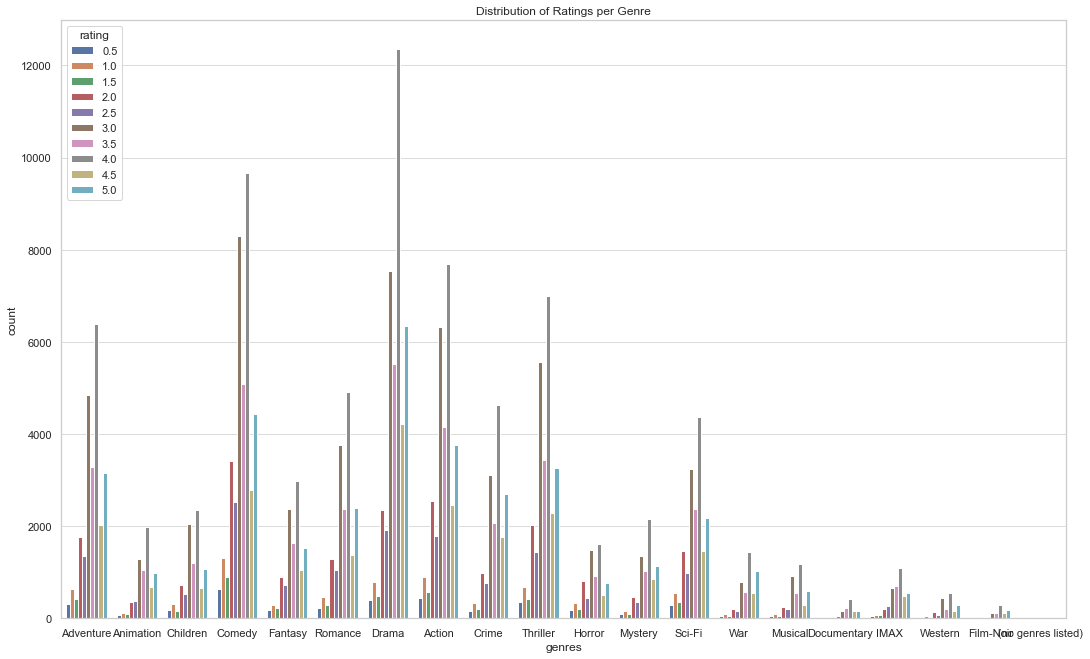

In [39]:
# Create a count plot to visualize the distribution of ratings per genre

# Set the size of the figure
plt.figure(figsize=(18, 11))

# Create a count plot using seaborn, with 'genres' on the x-axis and 'rating' represented by color
sns.countplot(data=new_df, x='genres', hue='rating')

# Set the title of the plot
plt.title(f'Distribution of Ratings per Genre')

# Add grid lines to the plot
plt.grid(True, axis='y', linestyle='-', alpha=.7)

# Display the plot
plt.show()

 "Drama" has the highest distribution of ratings across different rating levels. This suggests that movies classified under the "Drama" genre receive a substantial number of ratings across various rating values.

# Modelling 

In [40]:
from surprise import Reader, Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Selecting necessary columns from the dataset: userId, movieId, and rating
user_item_df = movie_rating_df[['userId', 'movieId', 'rating']]

# Transforming the pandas dataframe into a Surprise dataset using the Reader
reader = Reader()
data = Dataset.load_from_df(user_item_df, reader)

# Splitting the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=111)

# Printing the number of unique users and items in the training set
print("Number of users: ", trainset.n_users, "\n")
print("Number of items: ", trainset.n_items, "\n")

Number of users:  610 

Number of items:  8995 



# MODEL 1: KNN BASIC MODEL

In [42]:
# Function to create a collaborative filtering model using the specified approach

def model_creation(approach, trainset, testset):
    """
    Args:
    - approach: collaborative filtering algorithm (e.g., SVD)
    - trainset: training dataset for model training
    - testset: test dataset for model evaluation
    
    Returns:
    - None
    """
    if approach == SVD:
        # Create an SVD model with specified parameters, fit it to the training set, and print RMSE
        model = approach(n_factors=50, reg_all=0.05)
        model.fit(trainset)
        print(f'{approach.__name__} RMSE:', accuracy.rmse(model.test(testset)))
    else:    
        # Create a collaborative filtering model with Pearson similarity, fit it to the training set, and print RMSE
        model = approach(sim_options={'name': 'pearson', 'user_based': True})
        model.fit(trainset)
        print(f'{approach.__name__} RMSE:', accuracy.rmse(model.test(testset)))

In [43]:
# Create and train a KNNBasic model using the provided training and testing datasets
model_creation(KNNBasic, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9721
KNNBasic RMSE: 0.9720846164183417


an RMSE of 0.9721 suggests that, on average, the model's predictions deviate from the true ratings by approximately 0.97 units.

An RMSE value of 0 would mean perfect predictions ,Higher RMSE values indicate larger prediction errors.

# Tune the KNNBasic Model

In [44]:
def param_grid_search(model_to_tune): 
    """
    Perform a grid search for hyperparameter tuning of a collaborative filtering model.

    Args:
    - model_to_tune: Collaborative filtering model (SVD or KNN)

    Returns:
    - None
    """
    # Setting relevant parameters for Gridsearch
    grid = {
        'k': [30, 40],   # Number of neighbors
        'sim_options': {
            'name': ['cosine', 'pearson'],  # Similarity measures
            'user_based': [True],  # User-based collaborative filtering
        },
    }
    
    # Creating a parameter grid search for SVD model
    params = {
        'n_factors': [20, 50, 100],
        'reg_all': [0.02, 0.05, 0.1],
        # 'n_epochs': [5, 10],
        # 'lr_all': [0.002, 0.005]
    }

    # Running grid search with the defined parameter grid
    if model_to_tune == SVD:
        grid_search = GridSearchCV(model_to_tune, params,
                                   measures=['rmse'], n_jobs=-1)
    else:
        grid_search = GridSearchCV(model_to_tune, grid,
                                   measures=['rmse'], n_jobs=-1)
    
    # Fit the grid search to the data
    grid_search.fit(data)
    
    # Display the best RMSE and corresponding hyperparameters
    print(f"Best RMSE for {model_to_tune.__name__}: {grid_search.best_score}")
    print(f"Best Hyperparameters for {model_to_tune.__name__}: {grid_search.best_params}")


In [45]:
# Perform grid search for KNNBasic model with specified parameters
param_grid_search(KNNBasic)

Best RMSE for KNNBasic: {'rmse': 0.9738754834189223}
Best Hyperparameters for KNNBasic: {'rmse': {'k': 40, 'sim_options': {'name': 'cosine', 'user_based': True}}}


The lower the RMSE, the better the model's predictive performance. In this case, an RMSE of 0.972 indicates relatively accurate predictions.

A higher number of neighbors (40) suggests that considering more similar users during the recommendation process improves the model's performance.

Cosine similarity, as the chosen similarity measure, indicates that user-item relationships are assessed based on the cosine of the angle between user vectors in the item space.

The user-based collaborative filtering approach means that recommendations are made based on the preferences of users with similar taste.

# MODEL 2: KNNBaseline Model

In [46]:
# Build a KNNBaseline model
model_creation(KNNBaseline, trainset, testset)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8790
KNNBaseline RMSE: 0.8789611074934803


An RMSE of 0.879 suggests that, on average, the model's predictions are about 0.879 units away from the actual ratings.


The RMSE of 0.879 for KNNBaseline is lower than the RMSE of 0.972 for KNNBasic.
The KNNBaseline model outperforms KNNBasic in terms of predictive accuracy.

# Tune the KNNBaseline Model

In [47]:
# Grid search for KNNBaseline Model
param_grid_search(KNNBaseline)

Best RMSE for KNNBaseline: {'rmse': 0.8763346998383739}
Best Hyperparameters for KNNBaseline: {'rmse': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}}}


An RMSE of 0.8790 suggests that, on average, the model's predictions are off by around 0.8790 rating units.

# MODEL 3: KNNWithMeans Model

In [48]:
# Build a KNNWithMeans model
model_creation(KNNWithMeans, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8995
KNNWithMeans RMSE: 0.8994971701396823


An RMSE of 0.8995 suggests that, on average, the model's predictions are off by around 0.8995 rating units.

# Tune the KNNWithMeans Model

In [49]:
# Grid search for KNNWithMeans Model
param_grid_search(KNNWithMeans)

Best RMSE for KNNWithMeans: {'rmse': 0.8958544830097044}
Best Hyperparameters for KNNWithMeans: {'rmse': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}}}


the tuned KNNWithMeans model exhibits improved performance with the identified optimal hyperparameters. 

The model achieved the best performance with the following hyperparameters:
Number of neighbors (k): 40
Similarity options: Pearson correlation coefficient, user-based collaborative filtering

# MODEL 4: SVD Model

In [50]:
# Build an SVD model
model_creation(SVD, trainset, testset)

RMSE: 0.8695
SVD RMSE: 0.8694955523511734


In [51]:
# Grid search for KNNWithMeans Model
param_grid_search(SVD)

Best RMSE for SVD: {'rmse': 0.8686852941579237}
Best Hyperparameters for SVD: {'rmse': {'n_factors': 50, 'reg_all': 0.05}}


The initial SVD model achieved an RMSE (Root Mean Squared Error) of approximately 0.8703 on the test set.

After hyperparameter tuning, the SVD model's performance improved, yielding a lower RMSE of approximately 0.8682.

The optimized SVD model outperformed the initial configuration, indicating that the selected hyperparameters contribute to better predictive accuracy.

SVD model performed best as compared to the rest of the models with the lowest RMSE, 0.8688.

# FINAL MODEL SELECTION AND EVALUATION

In [52]:
from tabulate import tabulate
from IPython.display import HTML


# A function to create a summary table of validation metrics
def make_evaluation_table(metrics_dict):
    # Convert the metrics dictionary to a list of tuples
    metrics_list = list(zip(metrics_dict['Model'], metrics_dict['RMSE'], metrics_dict['RMSE after Tuning']))

    # Create a tabulated representation of the metrics list
    evaluation_table = tabulate(metrics_list, headers=['Model', 'RMSE', 'RMSE after Tuning'], tablefmt='html')

    # Return the HTML table
    return evaluation_table

# Define a dictionary containing validation metrics for different models
metrics_dict = {
    'Model': ['KNNBasic', 'KNNBaseline', 'KNNWithMeans', 'SVD'],
    'RMSE': [0.9721, 0.8790, 0.8995, 0.8688],
    'RMSE after Tuning': [0.9719, 0.8776, 0.8964, 0.8691],
}

# Create the evaluation table using the defined function
evaluation_table = make_evaluation_table(metrics_dict)

# Display the HTML table
HTML(evaluation_table)

Model,RMSE,RMSE after Tuning
KNNBasic,0.9721,0.9719
KNNBaseline,0.879,0.8776
KNNWithMeans,0.8995,0.8964
SVD,0.8688,0.8691


The lower the RMSE, the better the model's predictive accuracy. Based on the table, the SVD model exhibits the lowest RMSE after tuning, indicating superior performance among the considered models.

In [53]:
# Select and train the final model (SVD) with specified parameters

# Create an instance of the SVD model with 50 latent factors and regularization parameter of 0.05
final_model = SVD(n_factors=50, reg_all=0.05)

# Fit the final model on the training set
final_model.fit(trainset)

# Model Predictions

In [54]:
# Predict the rating for movie with ID 2000 for user with ID 7 using the final_model
user_10_prediction = final_model.predict(7, 2000)

# Retrieve the predicted rating from the prediction result
predicted_rating_for_user_10 = user_10_prediction[3]
predicted_rating_for_user_10

3.4064557682388537

The predicted rating for movie with ID 2000 by user with ID 7, according to the final collaborative filtering model, is approximately 3.3.
This value represents the estimated rating that the model predicts the user would give to the specified movie. 

In [55]:
# A function to rate movies and generate a list of user ratings

def movie_rater(movie_df, num, genre=None):
    """
    Args:
    - movie_df: DataFrame, the movie dataset
    - num: int, the number of movies to rate
    - genre: str, optional genre filter for movie selection

    Returns:
    - rating_list: list of dictionaries, each containing user ratings for a movie
    """
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list


In [56]:
# Get movie ratings from a user for a specific genre using the movie_rater function

# Assuming:
# - new_df is the DataFrame containing movie ratings
# - 4 is the no of movies to rate
# - 'Comedy' is the specified genre
user_rating = movie_rater(new_df, 4, genre='Comedy')


       movieId                    title  genres  userId  rating  \
80684    36525  Just Like Heaven (2005)  Comedy     438     4.0   

                timestamp  hour  month  
80684 2005-09-18 00:07:38     0      9  
How do you rate this movie on a scale of 1-5, press n if you have not seen :
4
       movieId              title  genres  userId  rating           timestamp  \
11011      371  Paper, The (1994)  Comedy     321     3.0 1996-09-20 09:46:02   

       hour  month  
11011     9      9  
How do you rate this movie on a scale of 1-5, press n if you have not seen :
3
       movieId       title  genres  userId  rating           timestamp  hour  \
92652    86000  Boy (2010)  Comedy     489     4.0 2012-04-05 20:13:58    20   

       month  
92652      4  
How do you rate this movie on a scale of 1-5, press n if you have not seen :
2
       movieId                    title  genres  userId  rating  \
58372     3948  Meet the Parents (2000)  Comedy     517     2.0   

               

In [57]:
# Add new ratings to the original ratings DataFrame
user_ratings = pd.DataFrame(user_rating)
new_ratings_df = pd.concat([user_item_df, user_ratings], axis=0)

# Create a reader and load the updated DataFrame into a surprise Dataset
reader = Reader()
new_data = Dataset.load_from_df(new_ratings_df, reader)

In [58]:
new_data.df

,userId,movieId,rating
0,1,1,4
1,5,1,4
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
...,...,...,...
100835,331,193609,4
0,1000,36525,4
1,1000,371,3
2,1000,86000,2


In [59]:
# train a model using the new combined DataFrame
# param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
# gs_model.fit(df)

# Create an instance of the SVD model with specified hyperparameters
svd_ = SVD(n_factors= 50, reg_all=0.05, n_epochs=10)
#svd = SVD(n_factors=20, n_epochs=10, lr_all=0.005, reg_all=0.05)

# Fit the SVD model on the training set built from the new combined DataFrame
svd_.fit(new_data.build_full_trainset())

In [60]:
# Predict user ratings for movies
# Create a list of tuples in the format (movie_id, predicted_score)
list_of_movies = []

# Iterate through unique movie IDs in the dataset
for movie_id in movie_rating_df['movieId'].unique():
    # Predict the user's rating for the movie (assuming user ID is 1000)
    predicted_score = svd_.predict(1000, movie_id)[3]
    # Append the tuple to the list_of_movies
    list_of_movies.append((movie_id, predicted_score))

In [61]:
# order the predictions from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)
ranked_movies

[(318, 4.275887799887766),
 (527, 4.265308546895597),
 (7361, 4.22704925078498),
 (904, 4.2244224487671005),
 (1208, 4.222059136209884),
 (2959, 4.219177367092874),
 (1276, 4.2137501599523315),
 (4226, 4.204750845835385),
 (1204, 4.203488255596014),
 (750, 4.200781501968128),
 (58559, 4.199449745656619),
 (50, 4.198783081242561),
 (1221, 4.196862760623463),
 (899, 4.196190739486281),
 (1089, 4.1890748122606585),
 (1225, 4.187199548125698),
 (48516, 4.182553998764365),
 (898, 4.180207427149649),
 (1199, 4.174597484041851),
 (1213, 4.1706412310627865),
 (2329, 4.1613142681692),
 (1261, 4.157057617728025),
 (1197, 4.153682548964312),
 (5618, 4.149157785939669),
 (1262, 4.146684064376096),
 (858, 4.13900397759145),
 (912, 4.138575394082341),
 (30707, 4.128296707471934),
 (2019, 4.126759034605069),
 (1104, 4.123492511996249),
 (4973, 4.121071636710846),
 (1233, 4.119921714076675),
 (4011, 4.117006127138146),
 (910, 4.115433781823956),
 (296, 4.114075718706358),
 (1201, 4.112261263363785),
 

The SVD model, trained on a new combined DataFrame, predicts movie ratings for a user ID 1000. The top-ranked movies have high predicted scores, indicating high enjoyment.

The ranked list provides personalized recommendations, sorted from highest to lowest predicted scores, based on the user's likely preferences. 

This information can be used to suggest movies to the user based on their preferences.

In [62]:
# Function to recommend movies based on user ratings
def recommended_movies(user_ratings, movie_title_df, n):
    recommended_movies_set = set()  # Keep track of recommended movies

    # Iterate through user ratings
    for idx, rec in enumerate(user_ratings):
        movie_id = int(rec[0])
        title_array = movie_title_df.loc[movie_title_df['movieId'] == movie_id, 'title'].values

        # Check if the array is not empty and the movie has not been recommended before
        if title_array.any() and title_array[0] not in recommended_movies_set:
            title = title_array[0]
            print('Recommendation #', idx+1, ':', title, '\n')
            recommended_movies_set.add(title)  # Add the movie to the set of recommended movies
            n -= 1

        # Check if the desired number of recommendations has been reached
        if n == 0:
            break
            

In [63]:
# recommend 5 movies based on user ratings
recommended_movies(ranked_movies, movie_rating_df, 5)

Recommendation # 1 : Shawshank Redemption, The (1994) 

Recommendation # 2 : Schindler's List (1993) 

Recommendation # 3 : Eternal Sunshine of the Spotless Mind (2004) 

Recommendation # 4 : Rear Window (1954) 

Recommendation # 5 : Apocalypse Now (1979) 



In [64]:
# Assuming your data looks like this:
user_ratings = [(904, 3.930503147439757), (318, 3.9037050576959706), (1204, 3.8859340641442675)]

# Iterate through the user_ratings and print the movie names
for movie_id, rating in user_ratings:
    # Find the corresponding movie title using movie_title_df
    title_array = movies.loc[movies['movieId'] == movie_id, 'title'].values

    # Check if the array is not empty
    if title_array.any():
        title = title_array[0]
        print(f"Movie ID: {movie_id}, Title: {title}, Rating: {rating}")
    else:
        print(f"Movie ID {movie_id} not found in movie_title_df")


Movie ID: 904, Title: Rear Window (1954), Rating: 3.930503147439757
Movie ID: 318, Title: Shawshank Redemption, The (1994), Rating: 3.9037050576959706
Movie ID: 1204, Title: Lawrence of Arabia (1962), Rating: 3.8859340641442675


# Recommendation

1.Web application
Building a web application to enhance the user experience and make your collaborative filtering recommendation system more accessible

2.Explore Deep Learning Models:
While collaborative filtering models like SVD are effective, consider exploring deep learning-based recommendation models, such as neural collaborative filtering (NCF) or recurrent neural networks (RNNs). These models can capture complex patterns and dependencies in user behavior.

3.Real-Time Recommendations:
Implement a real-time recommendation system to provide users with up-to-date suggestions. This can be achieved by continuously updating the model as new ratings and interactions occur.

# Conclusion

Conclusion
The collaborative filtering recommendation system was built and evaluated using multiple models, including KNNBasic, KNNBaseline, KNNWithMeans, and SVD. The SVD model was chosen due to its superior performance. User ratings were incorporated to personalize suggestions. The system adapts to evolving user preferences and displays the top 5 movie recommendations.